In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [16]:
data = pd.read_csv('../../../Data/Combo_4_DropNAs.csv')
data.shape

(11008224, 21)

In [17]:
data.head(5)

,Risk_Score,DI,Employment Length,Business Loan,Car Financing,Credit Card Refinancing,Debt Consolidation,Freedom,Green Loan,Home Improvement,...,Major Purchase,Medical Expenses,Motorcycle Loan,Moving And Relocation,Other,Personal Loan,Student Loan,Vacation,Wedding,Accepted
0,0.412616,-0.008238,2.685920,-0.154873,-0.215556,-0.413925,1.026948,-0.00611,-0.047763,-0.228405,...,-0.168965,-0.167132,-0.004879,-0.158008,-0.400368,-0.021752,-0.021131,-0.102729,-0.04297,1
1,0.875775,-0.007595,2.685920,6.456885,-0.215556,-0.413925,-0.973759,-0.00611,-0.047763,-0.228405,...,-0.168965,-0.167132,-0.004879,-0.158008,-0.400368,-0.021752,-0.021131,-0.102729,-0.04297,1
2,0.644195,-0.007930,2.685920,-0.154873,-0.215556,-0.413925,-0.973759,-0.00611,-0.047763,4.378179,...,-0.168965,-0.167132,-0.004879,-0.158008,-0.400368,-0.021752,-0.021131,-0.102729,-0.04297,1
3,1.686304,-0.007531,2.685920,-0.154873,-0.215556,-0.413925,1.026948,-0.00611,-0.047763,-0.228405,...,-0.168965,-0.167132,-0.004879,-0.158008,-0.400368,-0.021752,-0.021131,-0.102729,-0.04297,1
4,0.644195,-0.007005,0.466611,-0.154873,-0.215556,-0.413925,-0.973759,-0.00611,-0.047763,-0.228405,...,5.918370,-0.167132,-0.004879,-0.158008,-0.400368,-0.021752,-0.021131,-0.102729,-0.04297,1


In [32]:
data.Accepted.value_counts()*0.3

0    2668374.0
1     634093.2
Name: Accepted, dtype: float64

In [18]:
X = data.drop('Accepted', axis=1)
X.shape

(11008224, 20)

In [19]:
y = data['Accepted']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [23]:
clf.fit(X_train, y_train)

LogisticRegression()

In [24]:
clf.score(X_test, y_test)

0.8942493916670805

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2559137,  109238],
       [ 240000,  394093]])

In [31]:
confusion_matrix_full = pd.DataFrame(cm,
                                     index=["Actual_Rejected","Actual_Accepted"],
                                     columns=["Predicted_Rejected","Predicted_Accepted"])

confusion_matrix_full

,Predicted_Rejected,Predicted_Accepted
Actual_Rejected,2559137,109238
Actual_Accepted,240000,394093


In [34]:
X.columns

Index(['Risk_Score', 'DI', 'Employment Length', 'Business Loan',
       'Car Financing', 'Credit Card Refinancing', 'Debt Consolidation',
       'Freedom', 'Green Loan', 'Home Improvement', 'Home Purchase',
       'Major Purchase', 'Medical Expenses', 'Motorcycle Loan',
       'Moving And Relocation', 'Other', 'Personal Loan', 'Student Loan',
       'Vacation', 'Wedding'],
      dtype='object')

In [38]:
w0 = clf.intercept_[0]
w0

-3.7025198151477676

In [42]:
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20 = clf.coef_[0]

In [44]:
w1

1.5240894354677763

In [45]:
w

array([ 1.52408944e+00, -1.67924599e+02,  1.38808065e+00, -1.62968719e-01,
       -2.80732422e-01,  2.67237568e-01,  2.29172529e-01, -7.96533569e-02,
       -4.92197010e-02,  2.24340286e-02, -1.11879624e-01, -4.12874377e-02,
       -7.49625683e-02, -7.97439257e-02, -6.59196640e-02, -2.14329303e-01,
       -3.33844726e-01, -1.29741916e-02, -3.53576554e-02,  8.56206863e-03])

In [59]:
import math
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

#from sklearn.linear_model import LogisticRegression
#ax = feature_importance.plot.barh(x='feature', y='importance')
#plt.show()

In [60]:
feature_importance

,feature,importance
0,Risk_Score,4.590961e+00
2,Employment Length,4.007152e+00
5,Credit Card Refinancing,1.306351e+00
6,Debt Consolidation,1.257559e+00
9,Home Improvement,1.022688e+00
19,Wedding,1.008599e+00
17,Student Loan,9.871096e-01
18,Vacation,9.652601e-01
11,Major Purchase,9.595533e-01
8,Green Loan,9.519720e-01


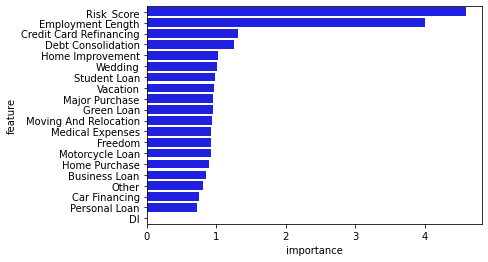

In [64]:
import seaborn as sns
sns.barplot(data=feature_importance, y='feature', x='importance', color='blue');

In [ ]:
## Something is wrong with DI. Look at original data again....! 